# 第 7 章 链路预测

## 导入库

In [1]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics

from modules.tools import graph_info

# 设置图形的显示风格和中文显示
sns.set_theme(font='SimHei')

## 自我中心网络

In [2]:
# 使用fblog数据
g = nx.read_graphml('../../Data/fblog.graphml')
graph_info(g)

Graph with 192 nodes and 1431 edges.
Graph type:      undirected unweighted 
Node attributes: name PolParty 
Edge attributes: 
Edge list:
[ 0]  jeunesverts.org/bordeaux                                  --  bix.enix.org/                                            
[ 1]  jeunesverts.org/bordeaux                                  --  dominiquevoynet.net/blog                                 
[ 2]  bix.enix.org/                                             --  www.arnaudcaron.net/                                     
[ 3]  bix.enix.org/                                             --  dominiquevoynet.net/blog                                 
[ 4]  bix.enix.org/                                             --  blogs.lesverts.fr/                                       
[ 5]  bix.enix.org/                                             --  emilien.net/                                             
...


In [3]:
g.nodes

NodeView(('n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19', 'n20', 'n21', 'n22', 'n23', 'n24', 'n25', 'n26', 'n27', 'n28', 'n29', 'n30', 'n31', 'n32', 'n33', 'n34', 'n35', 'n36', 'n37', 'n38', 'n39', 'n40', 'n41', 'n42', 'n43', 'n44', 'n45', 'n46', 'n47', 'n48', 'n49', 'n50', 'n51', 'n52', 'n53', 'n54', 'n55', 'n56', 'n57', 'n58', 'n59', 'n60', 'n61', 'n62', 'n63', 'n64', 'n65', 'n66', 'n67', 'n68', 'n69', 'n70', 'n71', 'n72', 'n73', 'n74', 'n75', 'n76', 'n77', 'n78', 'n79', 'n80', 'n81', 'n82', 'n83', 'n84', 'n85', 'n86', 'n87', 'n88', 'n89', 'n90', 'n91', 'n92', 'n93', 'n94', 'n95', 'n96', 'n97', 'n98', 'n99', 'n100', 'n101', 'n102', 'n103', 'n104', 'n105', 'n106', 'n107', 'n108', 'n109', 'n110', 'n111', 'n112', 'n113', 'n114', 'n115', 'n116', 'n117', 'n118', 'n119', 'n120', 'n121', 'n122', 'n123', 'n124', 'n125', 'n126', 'n127', 'n128', 'n129', 'n130', 'n131', 'n132', 'n133', 'n134', 'n135', 'n136', 'n13

In [4]:
# 查看节点的自我中心网络(包含自身)
n0 = list(g.nodes)[0]
ego0 = nx.ego_graph(g, n=n0, radius=1)
print(f'节点n0:{nx.get_node_attributes(g, "name")[n0]} 的自我中心网络：')
graph_info(ego0)

节点n0: jeunesverts.org/bordeaux 的自我中心网络：
Graph with 3 nodes and 3 edges.
Graph type:      undirected unweighted 
Node attributes: name PolParty 
Edge attributes: 
Edge list:
[0]  bix.enix.org/            --  jeunesverts.org/bordeaux
[1]  bix.enix.org/            --  dominiquevoynet.net/blog
[2]  jeunesverts.org/bordeaux --  dominiquevoynet.net/blog


In [5]:
# 查看节点的自我中心网络(包含自身)
n2 = list(g.nodes)[2]
ego2 = nx.ego_graph(g, n=n2, radius=1)
print(f'节点n2:{nx.get_node_attributes(g, "name")[n2]} 的自我中心网络：')
graph_info(ego2)

节点n2: www.arnaudcaron.net/ 的自我中心网络：
Graph with 5 nodes and 10 edges.
Graph type:      undirected unweighted 
Node attributes: name PolParty 
Edge attributes: 
Edge list:
[0]  emilien.net/             --  bix.enix.org/           
[1]  emilien.net/             --  www.arnaudcaron.net/    
[2]  emilien.net/             --  dominiquevoynet.net/blog
[3]  emilien.net/             --  blogs.lesverts.fr/      
[4]  dominiquevoynet.net/blog --  bix.enix.org/           
[5]  dominiquevoynet.net/blog --  www.arnaudcaron.net/    
...


## 共同邻居 (Common Neighbors, CN)

In [6]:
# 节点对列表
node_pairs = list(itertools.combinations(g.nodes, 2))
print(f'节点对数量：{len(node_pairs)}')
node_pairs[:5]

节点对数量：18336


[('n0', 'n1'), ('n0', 'n2'), ('n0', 'n3'), ('n0', 'n4'), ('n0', 'n5')]

In [7]:
# 计算节点对之间的共同邻居数量
for n1, n2 in node_pairs[:5]:
    cn = len(nx.common_neighbors(g, n1, n2))
    print(f'节点 {n1} 和节点 {n2} 的共同邻居数量：{cn}')

节点 n0 和节点 n1 的共同邻居数量：1
节点 n0 和节点 n2 的共同邻居数量：2
节点 n0 和节点 n3 的共同邻居数量：1
节点 n0 和节点 n4 的共同邻居数量：2
节点 n0 和节点 n5 的共同邻居数量：2


In [8]:
# 共同邻居数量与节点是否相连的关系
# result = pd.DataFrame(columns=['node1', 'node2', 'connected', 'cn'])
result = pd.DataFrame(node_pairs, columns=['node1', 'node2'])
result['connected'] = result.apply(lambda x: g.has_edge(x['node1'], x['node2']), axis=1)
result['cn'] = result.apply(lambda x: len(nx.common_neighbors(g, x['node1'], x['node2'])), axis=1)
# 查看数据
result.head()

,node1,node2,connected,cn
0,n0,n1,True,1
1,n0,n2,False,2
2,n0,n3,True,1
3,n0,n4,False,2
4,n0,n5,False,2


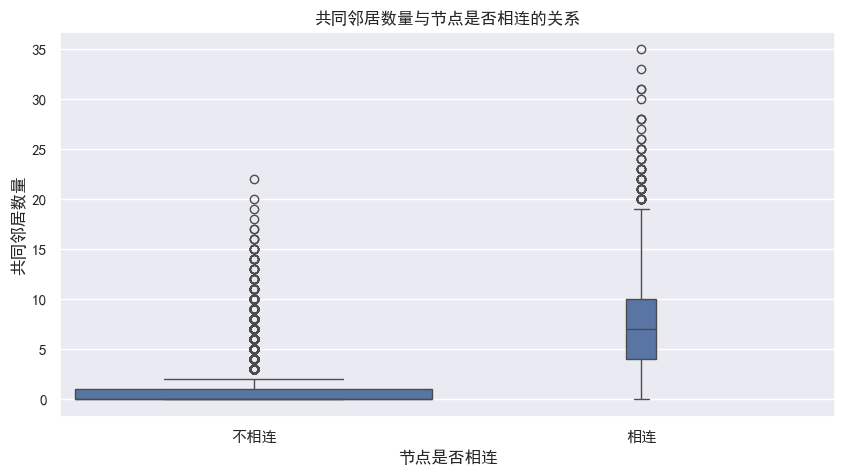

In [9]:
# 设置画布
plt.figure(figsize=(10, 5))
# 宽度对应节点对数量
width = result['connected'].value_counts(normalize=True)
# 绘制箱线图
sns.boxplot(x='connected', y='cn', data=result, width=width)
# 设置标签和标题
plt.xticks([False, True], ['不相连', '相连'])
plt.xlabel('节点是否相连')
plt.ylabel('共同邻居数量')
plt.title('共同邻居数量与节点是否相连的关系')
plt.show()

## 雅可比系数 (Jaccard Coefficient, JC)

In [10]:
# 计算Jaccard系数
for n1, n2 in node_pairs[:5]:
    jc = list(nx.jaccard_coefficient(g, [(n1, n2)]))[0][2]
    print(f'节点 {n1} 和节点 {n2} 的Jaccard系数：{jc:.2f}')

节点 n0 和节点 n1 的Jaccard系数：0.06
节点 n0 和节点 n2 的Jaccard系数：0.50
节点 n0 和节点 n3 的Jaccard系数：0.09
节点 n0 和节点 n4 的Jaccard系数：0.14
节点 n0 和节点 n5 的Jaccard系数：0.33


In [11]:
# 将结果添加到数据框中
result['jc'] = result.apply(lambda x: list(nx.jaccard_coefficient(g, [(x['node1'], x['node2'])]))[0][2], axis=1)
result.head()

,node1,node2,connected,cn,jc
0,n0,n1,True,1,0.058824
1,n0,n2,False,2,0.500000
2,n0,n3,True,1,0.090909
3,n0,n4,False,2,0.142857
4,n0,n5,False,2,0.333333


## Sorenson 指数 (Sorenson Index, SI)

In [12]:
# 计算Sorenson指数
def sorenson_index(G, u, v):
    # 计算两个节点的共同邻居数量
    cn = len(nx.common_neighbors(G, u, v))
    # 计算两个节点的Sorenson指数
    si = cn / (G.degree(u) + G.degree(v))
    return si

for u, v in node_pairs[:5]:
    si = sorenson_index(g, u, v)
    print(f'节点 {u} 和节点 {v} 的Sorenson指数为 {si:.2f}')

节点 n0 和节点 n1 的Sorenson指数为 0.06
节点 n0 和节点 n2 的Sorenson指数为 0.33
节点 n0 和节点 n3 的Sorenson指数为 0.08
节点 n0 和节点 n4 的Sorenson指数为 0.12
节点 n0 和节点 n5 的Sorenson指数为 0.25


In [13]:
# 将结果写入数据框
result['si'] = result.apply(lambda x: sorenson_index(g, x['node1'], x['node2']), axis=1)
result.head()

,node1,node2,connected,cn,jc,si
0,n0,n1,True,1,0.058824,0.055556
1,n0,n2,False,2,0.500000,0.333333
2,n0,n3,True,1,0.090909,0.083333
3,n0,n4,False,2,0.142857,0.125000
4,n0,n5,False,2,0.333333,0.250000


## Salton 余弦相似性 (Salton Cosine Similarity, SC)

In [14]:
# 计算Salton余弦相似性
def salton_cosine_similarity(G, u, v):
    # 计算两个节点的共同邻居数量
    cn = len(nx.common_neighbors(G, u, v))
    # 计算两个节点的Salton余弦相似性
    sc = cn / (G.degree(u) * G.degree(v))**0.5
    return sc

for u, v in node_pairs[:5]:
    sc = salton_cosine_similarity(g, u, v)
    print(f'节点 {u} 和节点 {v} 的Salton余弦相似性为 {sc:.2f}')

节点 n0 和节点 n1 的Salton余弦相似性为 0.18
节点 n0 和节点 n2 的Salton余弦相似性为 0.71
节点 n0 和节点 n3 的Salton余弦相似性为 0.22
节点 n0 和节点 n4 的Salton余弦相似性为 0.38
节点 n0 和节点 n5 的Salton余弦相似性为 0.58


In [15]:
# 将结果写入数据框
result['sc'] = result.apply(lambda x: salton_cosine_similarity(g, x['node1'], x['node2']), axis=1)
result.head()

,node1,node2,connected,cn,jc,si,sc
0,n0,n1,True,1,0.058824,0.055556,0.176777
1,n0,n2,False,2,0.500000,0.333333,0.707107
2,n0,n3,True,1,0.090909,0.083333,0.223607
3,n0,n4,False,2,0.142857,0.125000,0.377964
4,n0,n5,False,2,0.333333,0.250000,0.577350


## Leicht-Holme-Newman (LHN)

In [16]:
# 计算LHN指标
def leicht_holme_nerman(G, u, v):
    # 计算两个节点的共同邻居数量
    cn = len(nx.common_neighbors(G, u, v))
    # 计算两个节点的LHN指标
    lhn = cn / (G.degree(u) * G.degree(v))
    return lhn

for u, v in node_pairs[:5]:
    lhn = leicht_holme_nerman(g, u, v)
    print(f'节点 {u} 和节点 {v} 的LHN指标为 {lhn:.2f}')

节点 n0 和节点 n1 的LHN指标为 0.03
节点 n0 和节点 n2 的LHN指标为 0.25
节点 n0 和节点 n3 的LHN指标为 0.05
节点 n0 和节点 n4 的LHN指标为 0.07
节点 n0 和节点 n5 的LHN指标为 0.17


In [17]:
# 将结果写入数据框
result['lhn'] = result.apply(lambda x: leicht_holme_nerman(g, x['node1'], x['node2']), axis=1)
result.head()

,node1,node2,connected,cn,jc,si,sc,lhn
0,n0,n1,True,1,0.058824,0.055556,0.176777,0.031250
1,n0,n2,False,2,0.500000,0.333333,0.707107,0.250000
2,n0,n3,True,1,0.090909,0.083333,0.223607,0.050000
3,n0,n4,False,2,0.142857,0.125000,0.377964,0.071429
4,n0,n5,False,2,0.333333,0.250000,0.577350,0.166667


## Hub Promoted (HP)

In [18]:
# 计算Hub Promoted指标
def hub_promoted(G, u, v):
    # 计算两个节点的共同邻居数量
    cn = len(nx.common_neighbors(G, u, v))
    # 计算两个节点的Hub Promoted指标
    hp = cn / min(G.degree(u), G.degree(v))
    return hp

for u, v in node_pairs[:5]:
    hp = hub_promoted(g, u, v)
    print(f'节点 {u} 和节点 {v} 的Hub Promoted指标为 {hp:.2f}')

节点 n0 和节点 n1 的Hub Promoted指标为 0.50
节点 n0 和节点 n2 的Hub Promoted指标为 1.00
节点 n0 和节点 n3 的Hub Promoted指标为 0.50
节点 n0 和节点 n4 的Hub Promoted指标为 1.00
节点 n0 和节点 n5 的Hub Promoted指标为 1.00


In [19]:
# 将结果写入数据框
result['hp'] = result.apply(lambda x: hub_promoted(g, x['node1'], x['node2']), axis=1)
result.head()

,node1,node2,connected,cn,jc,si,sc,lhn,hp
0,n0,n1,True,1,0.058824,0.055556,0.176777,0.031250,0.5
1,n0,n2,False,2,0.500000,0.333333,0.707107,0.250000,1.0
2,n0,n3,True,1,0.090909,0.083333,0.223607,0.050000,0.5
3,n0,n4,False,2,0.142857,0.125000,0.377964,0.071429,1.0
4,n0,n5,False,2,0.333333,0.250000,0.577350,0.166667,1.0


## Hub Depressed (HD)

In [20]:
# 计算Hub Depressed指标
def hub_depressed(G, u, v):
    # 计算两个节点的共同邻居数量
    cn = len(nx.common_neighbors(G, u, v))
    # 计算两个节点的Hub Depressed指标
    hd = cn / max(G.degree(u), G.degree(v))
    return hd

for u, v in node_pairs[:5]:
    hd = hub_depressed(g, u, v)
    print(f'节点 {u} 和节点 {v} 的Hub Depressed指标为 {hd:.2f}')

节点 n0 和节点 n1 的Hub Depressed指标为 0.06
节点 n0 和节点 n2 的Hub Depressed指标为 0.50
节点 n0 和节点 n3 的Hub Depressed指标为 0.10
节点 n0 和节点 n4 的Hub Depressed指标为 0.14
节点 n0 和节点 n5 的Hub Depressed指标为 0.33


In [21]:
# 将结果写入数据框
result['hd'] = result.apply(lambda x: hub_depressed(g, x['node1'], x['node2']), axis=1)
result.head()

,node1,node2,connected,cn,jc,si,sc,lhn,hp,hd
0,n0,n1,True,1,0.058824,0.055556,0.176777,0.031250,0.5,0.062500
1,n0,n2,False,2,0.500000,0.333333,0.707107,0.250000,1.0,0.500000
2,n0,n3,True,1,0.090909,0.083333,0.223607,0.050000,0.5,0.100000
3,n0,n4,False,2,0.142857,0.125000,0.377964,0.071429,1.0,0.142857
4,n0,n5,False,2,0.333333,0.250000,0.577350,0.166667,1.0,0.333333


## Parameter-Dependent (PD)

In [22]:
# 计算Parameter-Dependent指标
def parameter_dependent(G, u, v, lambda_=0.5):
    # 计算两个节点的共同邻居数量
    cn = len(nx.common_neighbors(G, u, v))
    # 计算两个节点的Parameter-Dependent指标
    pd = cn / np.power(G.degree(u) * G.degree(v), lambda_)
    return pd

node_pair = node_pairs[0]
print(f'节点对：{node_pair}')
# 设置不同的λ值
lambdas = [0, 0.5, 1]
for lambda_ in lambdas:
    pd = parameter_dependent(g, node_pair[0], node_pair[1], lambda_)
    print(f'λ={lambda_:.1f} 时，Parameter-Dependent指标为 {pd:.2f}')
    
# 其结果分别退化为共同邻居数量、Salton余弦相似性和LHN指标
cn = len(nx.common_neighbors(g, node_pair[0], node_pair[1]))
sc = salton_cosine_similarity(g, node_pair[0], node_pair[1])
lhn = leicht_holme_nerman(g, node_pair[0], node_pair[1])
print(f'共同邻居数量：{cn:.2f}，Salton余弦相似性：{sc:.2f}，LHN指标：{lhn:.2f}')

节点对：('n0', 'n1')
λ=0.0 时，Parameter-Dependent指标为 1.00
λ=0.5 时，Parameter-Dependent指标为 0.18
λ=1.0 时，Parameter-Dependent指标为 0.03
共同邻居数量：1.00，Salton余弦相似性：0.18，LHN指标：0.03


## Preferential Attachment (PA)

In [23]:
# 计算Preferential Attachment指标
def preferential_attachment(G, u, v):
    # 计算两个节点的Preferential Attachment指标
    pa = G.degree(u) * G.degree(v)
    return pa

for u, v in node_pairs[:5]:
    pa = preferential_attachment(g, u, v)
    print(f'节点 {u} 和节点 {v} 的Preferential Attachment指标为 {pa:.2f}')

节点 n0 和节点 n1 的Preferential Attachment指标为 32.00
节点 n0 和节点 n2 的Preferential Attachment指标为 8.00
节点 n0 和节点 n3 的Preferential Attachment指标为 20.00
节点 n0 和节点 n4 的Preferential Attachment指标为 28.00
节点 n0 和节点 n5 的Preferential Attachment指标为 12.00


In [24]:
# 将结果写入数据框
result['pa'] = result.apply(lambda x: preferential_attachment(g, x['node1'], x['node2']), axis=1)
result.head()

,node1,node2,connected,cn,jc,si,sc,lhn,hp,hd,pa
0,n0,n1,True,1,0.058824,0.055556,0.176777,0.031250,0.5,0.062500,32
1,n0,n2,False,2,0.500000,0.333333,0.707107,0.250000,1.0,0.500000,8
2,n0,n3,True,1,0.090909,0.083333,0.223607,0.050000,0.5,0.100000,20
3,n0,n4,False,2,0.142857,0.125000,0.377964,0.071429,1.0,0.142857,28
4,n0,n5,False,2,0.333333,0.250000,0.577350,0.166667,1.0,0.333333,12


## Adamic-Adar (AA)

In [25]:
# 计算Adamic-Adar系数
for u, v in node_pairs[:5]:
    aa = list(nx.adamic_adar_index(g, [(u, v)]))[0][2]
    print(f'节点 {u} 和节点 {v} 的Adamic-Adar系数为 {aa:.2f}')

节点 n0 和节点 n1 的Adamic-Adar系数为 0.43
节点 n0 和节点 n2 的Adamic-Adar系数为 0.79
节点 n0 和节点 n3 的Adamic-Adar系数为 0.36
节点 n0 和节点 n4 的Adamic-Adar系数为 0.79
节点 n0 和节点 n5 的Adamic-Adar系数为 0.79


In [26]:
# 将结果写入数据框
result['aa'] = result.apply(lambda x: list(nx.adamic_adar_index(g, [(x['node1'], x['node2'])]))[0][2], axis=1)
result.head()

,node1,node2,connected,cn,jc,si,sc,lhn,hp,hd,pa,aa
0,n0,n1,True,1,0.058824,0.055556,0.176777,0.031250,0.5,0.062500,32,0.434294
1,n0,n2,False,2,0.500000,0.333333,0.707107,0.250000,1.0,0.500000,8,0.794968
2,n0,n3,True,1,0.090909,0.083333,0.223607,0.050000,0.5,0.100000,20,0.360674
3,n0,n4,False,2,0.142857,0.125000,0.377964,0.071429,1.0,0.142857,28,0.794968
4,n0,n5,False,2,0.333333,0.250000,0.577350,0.166667,1.0,0.333333,12,0.794968


## 资源分配 (Resource Allocation, RA)

In [27]:
# 计算Resource Allocation指标
for u, v in node_pairs[:5]:
    ra = list(nx.resource_allocation_index(g, [(u, v)]))[0][2]
    print(f'节点 {u} 和节点 {v} 的Resource Allocation指标为 {ra:.2f}')

节点 n0 和节点 n1 的Resource Allocation指标为 0.10
节点 n0 和节点 n2 的Resource Allocation指标为 0.16
节点 n0 和节点 n3 的Resource Allocation指标为 0.06
节点 n0 和节点 n4 的Resource Allocation指标为 0.16
节点 n0 和节点 n5 的Resource Allocation指标为 0.16


In [28]:
# 将结果写入数据框
result['ra'] = result.apply(lambda x: list(nx.resource_allocation_index(g, [(x['node1'], x['node2'])]))[0][2], axis=1)
result.head()

,node1,node2,connected,cn,jc,si,sc,lhn,hp,hd,pa,aa,ra
0,n0,n1,True,1,0.058824,0.055556,0.176777,0.031250,0.5,0.062500,32,0.434294,0.1000
1,n0,n2,False,2,0.500000,0.333333,0.707107,0.250000,1.0,0.500000,8,0.794968,0.1625
2,n0,n3,True,1,0.090909,0.083333,0.223607,0.050000,0.5,0.100000,20,0.360674,0.0625
3,n0,n4,False,2,0.142857,0.125000,0.377964,0.071429,1.0,0.142857,28,0.794968,0.1625
4,n0,n5,False,2,0.333333,0.250000,0.577350,0.166667,1.0,0.333333,12,0.794968,0.1625


## 局部路径 (Local Path, LP)

In [29]:
# 计算局部路径指标
def local_path(G, u=None, v=None, alpha=0.01):
    # 计算两个节点的局部路径指标
    node_list = list(G.nodes)
    A = nx.to_numpy_array(G, nodelist=node_list)
    lp_matrix = A @ A + alpha * A @ A @ A
    if u and v:
        lp = lp_matrix[node_list.index(u), node_list.index(v)]
        return lp
    else:
        return lp_matrix

for u, v in node_pairs[:5]:
    lp = local_path(g, u, v)
    print(f'节点 {u} 和节点 {v} 的局部路径指标为 {lp:.2f}')

节点 n0 和节点 n1 的局部路径指标为 1.22
节点 n0 和节点 n2 的局部路径指标为 2.06
节点 n0 和节点 n3 的局部路径指标为 1.16
节点 n0 和节点 n4 的局部路径指标为 2.09
节点 n0 和节点 n5 的局部路径指标为 2.07


In [30]:
# 将结果写入数据框
lp_matrix = local_path(g)
result['lp'] = result.apply(lambda x: lp_matrix[list(g.nodes).index(x['node1']), list(g.nodes).index(x['node2'])], axis=1)
result.head()

,node1,node2,connected,cn,jc,si,sc,lhn,hp,hd,pa,aa,ra,lp
0,n0,n1,True,1,0.058824,0.055556,0.176777,0.031250,0.5,0.062500,32,0.434294,0.1000,1.22
1,n0,n2,False,2,0.500000,0.333333,0.707107,0.250000,1.0,0.500000,8,0.794968,0.1625,2.06
2,n0,n3,True,1,0.090909,0.083333,0.223607,0.050000,0.5,0.100000,20,0.360674,0.0625,1.16
3,n0,n4,False,2,0.142857,0.125000,0.377964,0.071429,1.0,0.142857,28,0.794968,0.1625,2.09
4,n0,n5,False,2,0.333333,0.250000,0.577350,0.166667,1.0,0.333333,12,0.794968,0.1625,2.07


## 结果比较

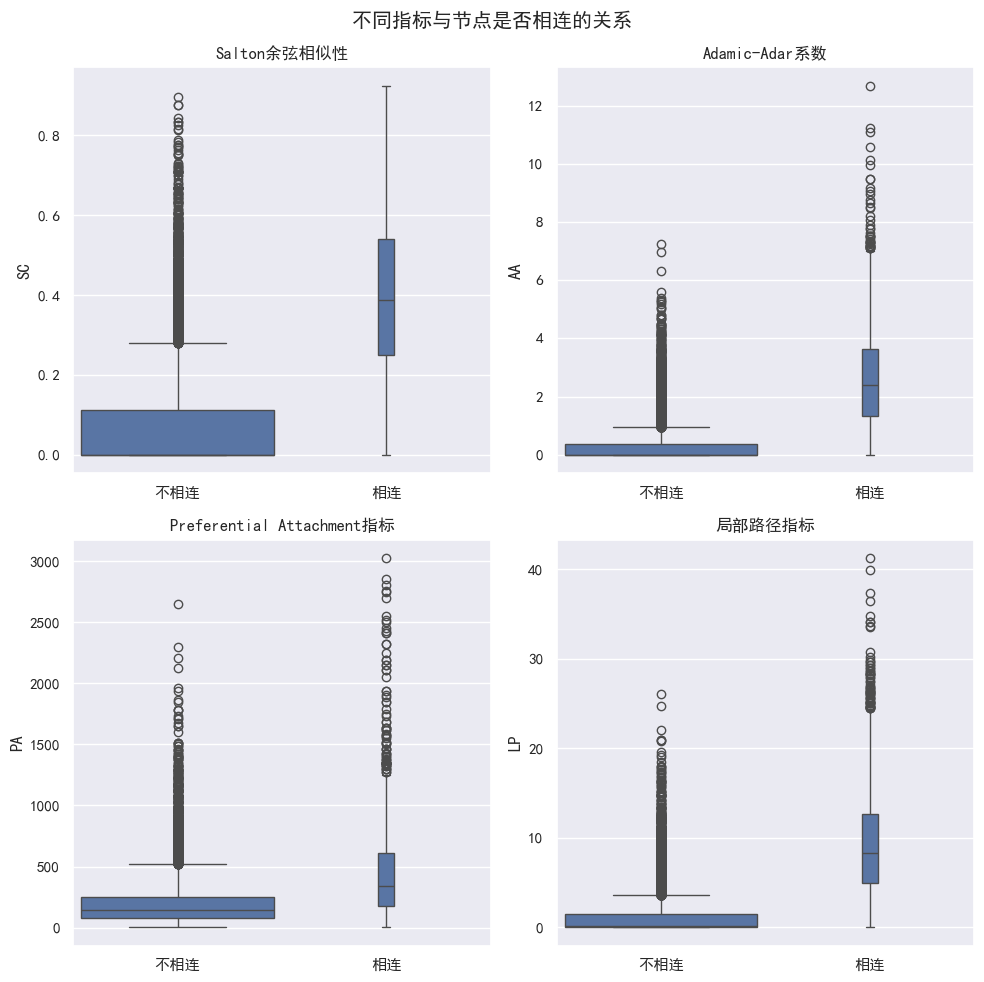

In [31]:
methods = {
    'sc': 'Salton余弦相似性',
    'aa': 'Adamic-Adar系数',
    'pa': 'Preferential Attachment指标',
    'lp': '局部路径指标'
}
# 设置画布
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# 绘制箱线图
for i, (method, name) in enumerate(methods.items()):
    ax = axs[i // 2, i % 2]
    sns.boxplot(x='connected', y=method, data=result, width=width, ax=ax)
    ax.set_xticks([False, True], ['不相连', '相连'])
    ax.set_xlabel(None)
    ax.set_ylabel(method.upper())
    ax.set_title(name)
fig.suptitle('不同指标与节点是否相连的关系')
plt.tight_layout()
plt.show()

## 预测效果评价

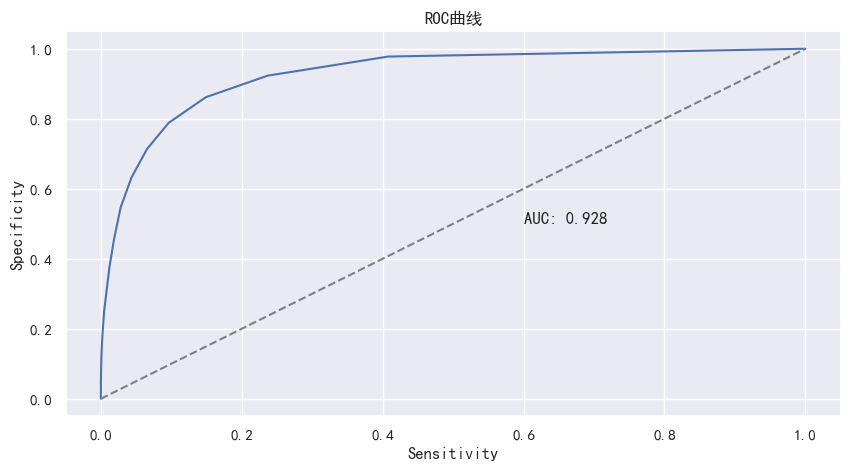

In [32]:
# 设置画布
plt.figure(figsize=(10, 5))
# 计算roc曲线
fpr, tpr, _ = metrics.roc_curve(result['connected'], result['cn'])
auc = metrics.auc(fpr, tpr)
# 绘制roc曲线
plt.plot(fpr, tpr)
# 绘制对角线 其表示随机分类器的性能
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.text(0.6, 0.5, f'AUC: {auc:.3f}', fontsize=12)
plt.xlabel('Sensitivity')
plt.ylabel('Specificity')
plt.title('ROC曲线')
plt.show()

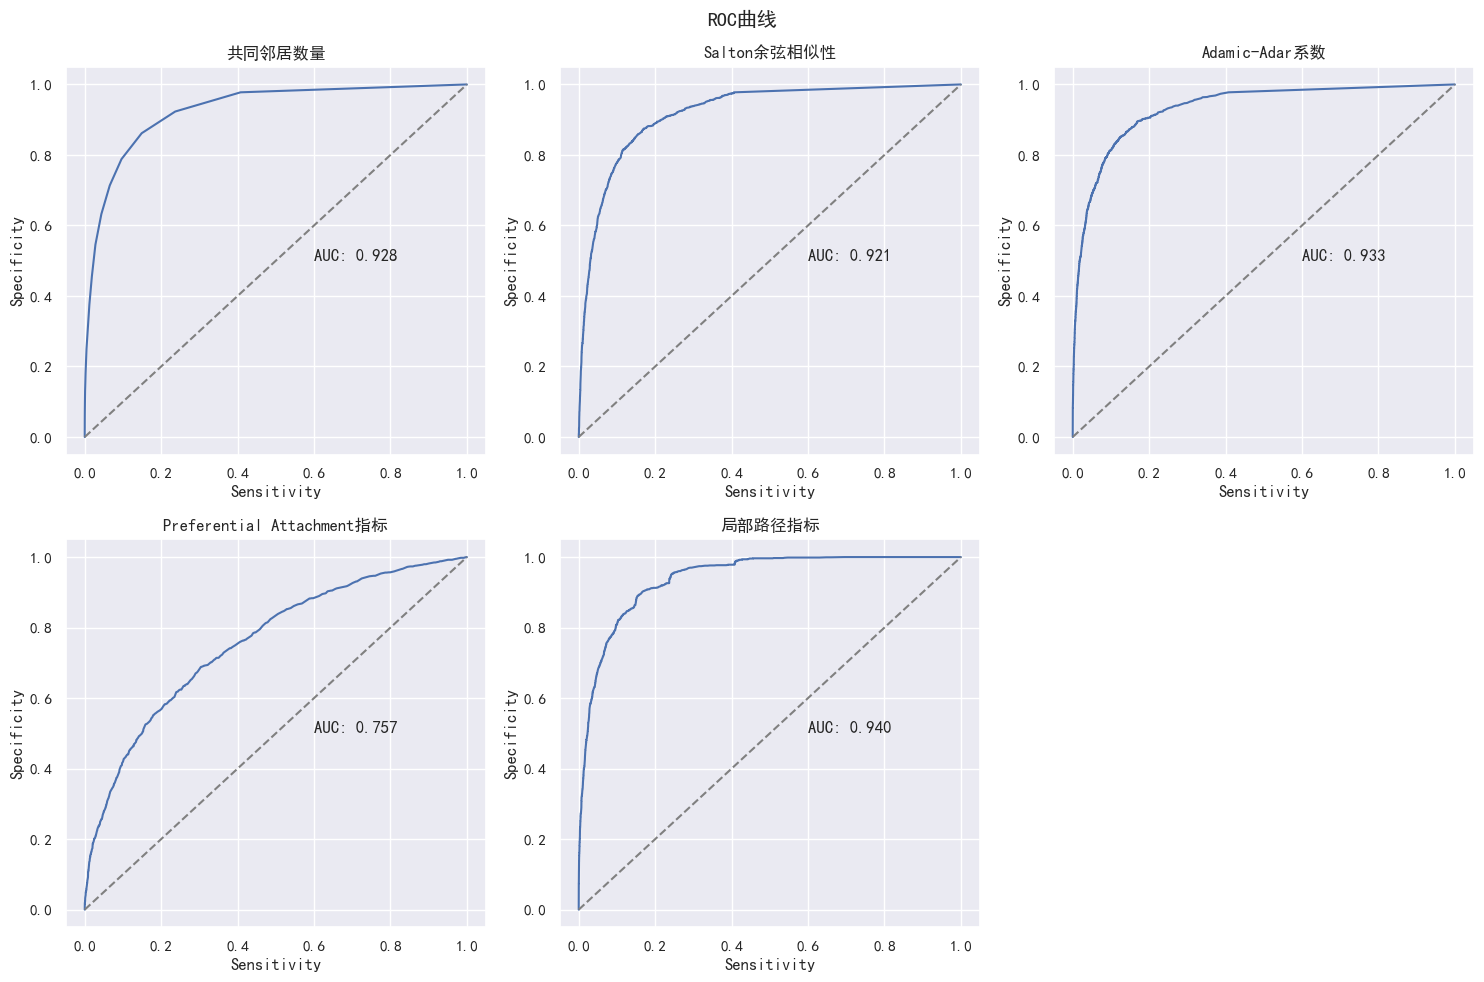

In [33]:
methods = {
    'cn': '共同邻居数量',
    'sc': 'Salton余弦相似性',
    'aa': 'Adamic-Adar系数',
    'pa': 'Preferential Attachment指标',
    'lp': '局部路径指标'
}

# 设置画布
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
# 绘制roc曲线
for i, (method, name) in enumerate(methods.items()):
    ax = axs[i // 3, i % 3]
    fpr, tpr, _ = metrics.roc_curve(result['connected'], result[method])
    auc = metrics.auc(fpr, tpr)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax.text(0.6, 0.5, f'AUC: {auc:.3f}', fontsize=12)
    ax.set_xlabel('Sensitivity')
    ax.set_ylabel('Specificity')
    ax.set_title(name)
fig.delaxes(axs[1, 2]) # 删除最后一个子图
fig.suptitle('ROC曲线') # 设置总标题
plt.tight_layout()
plt.show()